In [6]:
import gradio as gr
import pandas as pd
import mlflow
import numpy as np
import mlflow.pyfunc
import xgboost as xgb
import mlflow.xgboost
import pickle
from gradio_functions import *
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
df = pd.read_excel(r"C:\Users\mbauer2\workspace\Uni\enterprise-ai-project\immowelt_price_guide\results-selected-features-aug.xlsx")

In [3]:
df


,Unnamed: 0,tags.mlflow.runName,metrics.mae,metrics.r2,experiment
0,0,baseline_rent,285.556400,0.580289,wue-rent-selected-features
1,2,elasticNet,231.958821,0.724565,wue-rent-selected-features
2,3,xgb,212.349642,0.732313,wue-rent-selected-features
3,4,random-forest,194.380348,0.745000,wue-rent-selected-features
4,6,lasso-regression,128.914193,0.889057,wue-rent-selected-features
5,5,ridge-regression,127.370784,0.889534,wue-rent-selected-features
6,1,linear-regression,120.690395,0.896594,wue-rent-selected-features


In [10]:
plot = px.bar(df, x="tags.mlflow.runName", y="metrics.mae", title="Modellperformance", color="tags.mlflow.runName", color_continuous_scale=px.colors.sequential.Viridis)

In [11]:
plot

In [4]:
# import matplotlib.pyplot as plt
# def bar_chart():
#     models = df['tags.mlflow.runName']
#     mae_values = df['metrics.mae']
#     plt.bar(models, mae_values)
#     plt.xlabel('Modelle')
#     plt.ylabel('MAE')
#     plt.title('Vergleich der Modelle anhand von MAE')
#     plt.xticks(rotation=45)
#     plt.show()

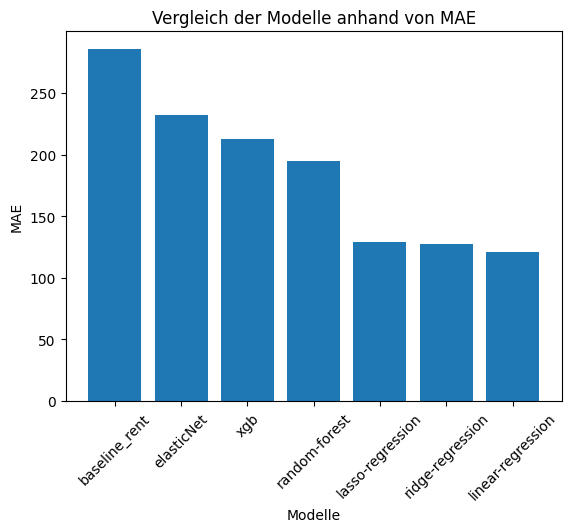

,Unnamed: 0,tags.mlflow.runName,metrics.mae,metrics.r2,experiment
0,0,baseline_rent,285.556400,0.580289,wue-rent-selected-features
1,2,elasticNet,231.958821,0.724565,wue-rent-selected-features
2,3,xgb,212.349642,0.732313,wue-rent-selected-features
3,4,random-forest,194.380348,0.745000,wue-rent-selected-features
4,6,lasso-regression,128.914193,0.889057,wue-rent-selected-features
5,5,ridge-regression,127.370784,0.889534,wue-rent-selected-features
6,1,linear-regression,120.690395,0.896594,wue-rent-selected-features


In [5]:
bar_chart(r"C:\Users\mbauer2\workspace\Uni\enterprise-ai-project\immowelt_price_guide\results-selected-features-aug.xlsx")

In [6]:
with gr.Blocks() as demo:
    with gr.Tab(label='Immopreisrechner'):
    
        gr.Markdown(
        """
        # Geben Sie hier an, welche Merkmale Ihre Immobilie besitzt 🏠:
        """
        )
        with gr.Row():
            feature_zip = gr.Dropdown(
                label="Postleitzahl",
                choices=[
                    "97070 Würzburg-Altstadt",
                    "97072 Würzburg-Sanderau",
                    "97074 Würzburg-Frauenland",
                    "97076 Würzburg-Lengfeld",
                    "97078 Würzburg-Lindleinsmühle",
                    "97080 Würzburg-Dürrbachtal",
                    "97082 Würzburg-Steinbachtal",
                    "97084 Würzburg-Heuchelhof",
                    "97204 Höchberg",
                    "97209 Veitshöchheim",
                    "97218 Gerbrunn",
                    "97222 Rimpar",
                    "97228 Rottendorf",
                    "97234 Reichenberg",
                    "97236 Randersacker",
                    "97246 Eibelstadt",
                    "97249 Eisingen",
                    "97250 Erlabrunn",
                    "97261 Güntersleben",
                    "97270 Kist",
                    "97288 Theilheim",
                    "97297 Waldbüttelbrunn",
                    "97299 Zell am Main",
                ],
                value="97070 Würzburg-Altstadt",
            )
        with gr.Row():
            feature_squrmeter = gr.Number(label="Wohnfläche [qm]", value=79)
        with gr.Row():
            feature_rooms = gr.Number(label="Anzahl der Zimmer", value=3)
        with gr.Row():
            features_altbau = gr.Checkbox(label="Altbau (bis 1945)")
            feature_balkon = gr.Checkbox(label="Balkon")
            feature_ba = gr.Checkbox(label="Barrierefrei")
            feature_dachgeschoss = gr.Checkbox(label="Dachgeschoss")
            feature_einbaukueche = gr.Checkbox(label="Einbauküche")
            feature_neubau = gr.Checkbox(label="Neubau")
            feature_parkett = gr.Checkbox(label="Parkett")
            feature_stellplatz = gr.Checkbox(label="Stellplatz")
            feature_badwc_getrennt = gr.Checkbox(label="Bad/WC getrennt")
            feature_personenaufzug = gr.Checkbox(label="Personenaufzug")
            feature_garten = gr.Checkbox(label="Garten")
            feature_garage = gr.Checkbox(label="Garage")
            feature_renoviert = gr.Checkbox(label="Renoviert")
            feature_terrasse = gr.Checkbox(label="Terrasse")
            feature_wanne = gr.Checkbox(label="Badewanne")
            feature_zentralheizung = gr.Checkbox(label="Zentralheizung")
            feature_abstellraum = gr.Checkbox(label="Abstellraum")
            feature_fernwaerme = gr.Checkbox(label="Fernwärme")
            feature_fussbodenheitzung = gr.Checkbox(label="Fußbodenheizung")
            feature_gartenmitbenutzung = gr.Checkbox(label="Gartenmitbenutzung")
            feature_kellerabteil = gr.Checkbox(label="Kellerabteil")

        with gr.Accordion("erweiterte Optionen"):
            erklärung = gr.Checkbox(label="mit XGBoost vorhersagen")

        btn = gr.Button("Berechne deinen Preis")
        output_html = gr.HTML(label="Dein Preis")
        btn.click(
            fn=trigger_actions,
            inputs=[
                feature_squrmeter,
                feature_zip,
                feature_rooms,
                features_altbau,
                feature_balkon,
                feature_ba,
                feature_dachgeschoss,
                feature_einbaukueche,
                feature_neubau,
                feature_parkett,
                feature_stellplatz,
                feature_badwc_getrennt,
                feature_personenaufzug,
                feature_garten,
                feature_garage,
                feature_renoviert,
                feature_terrasse,
                feature_wanne,
                feature_zentralheizung,
                feature_abstellraum,
                feature_fernwaerme,
                feature_fussbodenheitzung,
                feature_gartenmitbenutzung,
                feature_kellerabteil,
                erklärung
            ],
            #gebe mir den output der funktion in einem number gradio widget aus
            outputs=[output_html]
        )
    with gr.Tab(label="Erklärung"):
        gr.Markdown(
        """
        # Admin-Seite
        ## Hier können Sie Ihre Modelle nachtrainieren und die verschiedenen Modelle vergleichen.
        """
        )
        nachtraining = gr.Button('Modelle nachtrainieren und evaluieren')
        #nachtraining.click(fn=load_model, inputs=[model_name])
        Plot = gr.Plot()
        
demo.launch(debug=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.
